In [1]:
!pip install earthpy
!pip install rioxarray

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 KB 393.1 kB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ done
  Getting requirements to build wheel ... - \ | / - done
  Preparing metadata (pyproject.toml) ... - \ | / - done
  Created wheel for rioxarray: filename=rioxarray-0.9.1-py3-none-any.whl size=54609 sha256=c4b2aa0abe40fccaafee57e776a67ef7bcf0bd34957248172647f397653cb004
  Stored in directory: /root/.cache/pip/wheels/07/da/9e/1cc57b2e7a29a206893db83e984a341e2e94378263e0798229
Successfully built rioxarray


In [2]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt
import rioxarray as rxr
import geopandas as gpd
from shapely.geometry import mapping
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [3]:
y2004_path = "../input/konya-kapal-havzas-l52/Bulk Order KKH 2004/Bulk Order KKH 2004/Landsat C2 L2 Band Files"
y2003_path = "../input/konya-kapal-havzas-l52/Bulk Order KKH 2003/Bulk Order KKH 2003/Landsat C2 L2 Band Files"
y2002_path = "../input/konya-kapal-havzas-l52/Bulk Order KKH 2002/Bulk Order KKH 2002/Landsat C2 L2 Band Files"
y2001_path = "../input/konya-kapal-havzas-l52/Bulk Order KKH 2001/Bulk Order KKH 2001/Landsat C2 L2 Band Files"
y2000_path = "../input/konya-kapal-havzas-l52/Bulk Order KKH 2000/Bulk Order KKH 2000/Landsat C2 L2 Band Files"

pathlist = [y2004_path, y2003_path, y2002_path, y2001_path, y2000_path]

In [4]:
y2004 = os.listdir(y2004_path)
y2003 = os.listdir(y2003_path)
y2002 = os.listdir(y2002_path)
y2001 = os.listdir(y2001_path)
y2000 = os.listdir(y2000_path)

y2004.sort()
y2003.sort()
y2002.sort()
y2001.sort()
y2000.sort()

years = [y2004, y2003, y2002, y2001, y2000]

In [5]:
for y in years:
    for g in y:
        if g.endswith("B4.TIF") or g.endswith("B3.TIF"):
            continue
        else:
            y.remove(g)

In [6]:
y2004

['LT05_L2SP_176033_20040709_20200903_02_T1_SR_B3.TIF',
 'LT05_L2SP_176033_20040709_20200903_02_T1_SR_B4.TIF',
 'LT05_L2SP_176033_20040826_20200903_02_T1_SR_B3.TIF',
 'LT05_L2SP_176033_20040826_20200903_02_T1_SR_B4.TIF',
 'LT05_L2SP_176034_20040607_20200903_02_T1_SR_B3.TIF',
 'LT05_L2SP_176034_20040607_20200903_02_T1_SR_B4.TIF',
 'LT05_L2SP_176034_20040826_20200903_02_T1_SR_B3.TIF',
 'LT05_L2SP_176034_20040826_20200903_02_T1_SR_B4.TIF',
 'LT05_L2SP_176034_20040927_20200903_02_T2_SR_B3.TIF',
 'LT05_L2SP_176034_20040927_20200903_02_T2_SR_B4.TIF',
 'LT05_L2SP_177033_20040630_20200903_02_T1_SR_B3.TIF',
 'LT05_L2SP_177033_20040630_20200903_02_T1_SR_B4.TIF',
 'LT05_L2SP_177034_20040630_20200903_02_T1_SR_B3.TIF',
 'LT05_L2SP_177034_20040630_20200903_02_T1_SR_B4.TIF',
 'LT05_L2SP_177034_20040801_20200903_02_T1_SR_B3.TIF',
 'LT05_L2SP_177034_20040801_20200903_02_T1_SR_B4.TIF',
 'LT05_L2SP_177034_20040902_20200903_02_T1_SR_B3.TIF',
 'LT05_L2SP_177034_20040902_20200903_02_T1_SR_B4.TIF',
 'LT05_L2S

In [7]:
kkh_shp = gpd.read_file("../input/2204-d-havza-s-n-rlar-na-k-rpma-l89-1/Konya_Kapali_Havzasi_Polygon.shp")
kkh_shp = kkh_shp.to_crs("EPSG:32636")
kkh_shp

,Havza_Ad,geometry
0,Konya Kapal? Havzas?,"POLYGON ((679586.461 4205920.914, 679013.990 4..."


In [8]:
for year in range(2000,2005):
    os.mkdir("./Year_"+ str(year))
    
os.listdir("./")

['Year_2000',
 'Year_2001',
 'Year_2002',
 'Year_2003',
 '__notebook__.ipynb',
 'Year_2004']

In [9]:
os.listdir("./")

['Year_2000',
 'Year_2001',
 'Year_2002',
 'Year_2003',
 '__notebook__.ipynb',
 'Year_2004']

In [10]:
def clipping4all(bandlist, path):
    sayac = 0
    for uydu in bandlist:
        sayac+=1
        inpath = os.path.join(path, uydu) # görüntünün adresi
        year = uydu[17:21]
        outpath = os.path.join("./Year_"+ str(year), uydu)
        
        img_pre_arr = rxr.open_rasterio(inpath, masked=True).squeeze() # No data değerler maskelendi ve 2D
        img_clipped = img_pre_arr.rio.clip(kkh_shp.geometry.apply(mapping)) # Kırpılma
        img_clipped.rio.to_raster(outpath) # Yeni görüntüyü kaydetme
        if sayac%5 == 0:
            print("İşlem {} tamamlandı.".format(sayac)) # İşlemleri takip edebilmek için
            time.sleep(2) # Programın dinlenmesi için   
    print("*******************")

In [11]:
for a in range(len(years)):
    clipping4all(years[a], pathlist[a])

İşlem 5 tamamlandı.
İşlem 10 tamamlandı.
İşlem 15 tamamlandı.
İşlem 20 tamamlandı.
İşlem 25 tamamlandı.
*******************
İşlem 5 tamamlandı.
İşlem 10 tamamlandı.
İşlem 15 tamamlandı.
İşlem 20 tamamlandı.
İşlem 25 tamamlandı.
*******************
İşlem 5 tamamlandı.
İşlem 10 tamamlandı.
İşlem 15 tamamlandı.
*******************
İşlem 5 tamamlandı.
İşlem 10 tamamlandı.
İşlem 15 tamamlandı.
İşlem 20 tamamlandı.
İşlem 25 tamamlandı.
İşlem 30 tamamlandı.
*******************
İşlem 5 tamamlandı.
İşlem 10 tamamlandı.
İşlem 15 tamamlandı.
İşlem 20 tamamlandı.
İşlem 25 tamamlandı.
İşlem 30 tamamlandı.
İşlem 35 tamamlandı.
İşlem 40 tamamlandı.
*******************


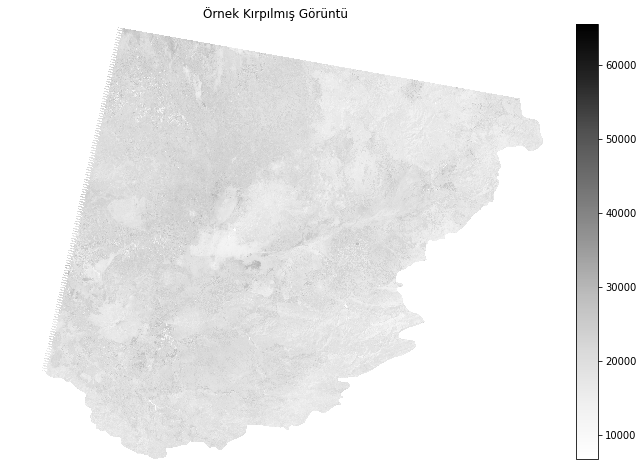

In [12]:
f, ax = plt.subplots(figsize=(12, 8))
example_path = os.path.join("./Year_2004", y2004[7])
example = rxr.open_rasterio(example_path, masked = True).squeeze()
example.plot(ax = ax, cmap = "Greys")
ax.set(title="Örnek Kırpılmış Görüntü")
ax.set_axis_off()
plt.show()